#Base de dados - Steel Industry Data Set

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Steel_industry_data.csv')

Mounted at /content/drive/


In [ ]:
feature_names = [
    "Usage_kWh",
    "Lagging_Current_Reactive.Power_kVarh",
    "Leading_Current_Reactive_Power_kVarh",
    "CO2(tCO2)",
    "Lagging_Current_Power_Factor",
    "Leading_Current_Power_Factor",
    "NSM"
]

X = dados[feature_names].values
y = dados["Load_Type"].values
target_names = np.unique(y)

print("Características:", feature_names)
print("Classes:", target_names)

Características: ['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM']
Classes: ['Light_Load' 'Maximum_Load' 'Medium_Load']


Verificando se há desbalanceamento

In [ ]:
dados['Load_Type'].value_counts()

,count
Load_Type,
Light_Load,18072
Medium_Load,9696
Maximum_Load,7272


Verificando se há dados nulos

In [ ]:
dados.isnull()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
35035,False,False,False,False,False,False,False,False,False,False,False
35036,False,False,False,False,False,False,False,False,False,False,False
35037,False,False,False,False,False,False,False,False,False,False,False
35038,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
dados.isnull().sum()

,0
date,0
Usage_kWh,0
Lagging_Current_Reactive.Power_kVarh,0
Leading_Current_Reactive_Power_kVarh,0
CO2(tCO2),0
Lagging_Current_Power_Factor,0
Leading_Current_Power_Factor,0
NSM,0
WeekStatus,0
Day_of_week,0


Dados Duplicados


In [ ]:
dados.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
35035,False
35036,False
35037,False
35038,False


Detectando Outlier

In [ ]:
dados.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


Box-Plot


In [ ]:
import matplotlib.pyplot as plt

<Figure size 1200x600 with 0 Axes>

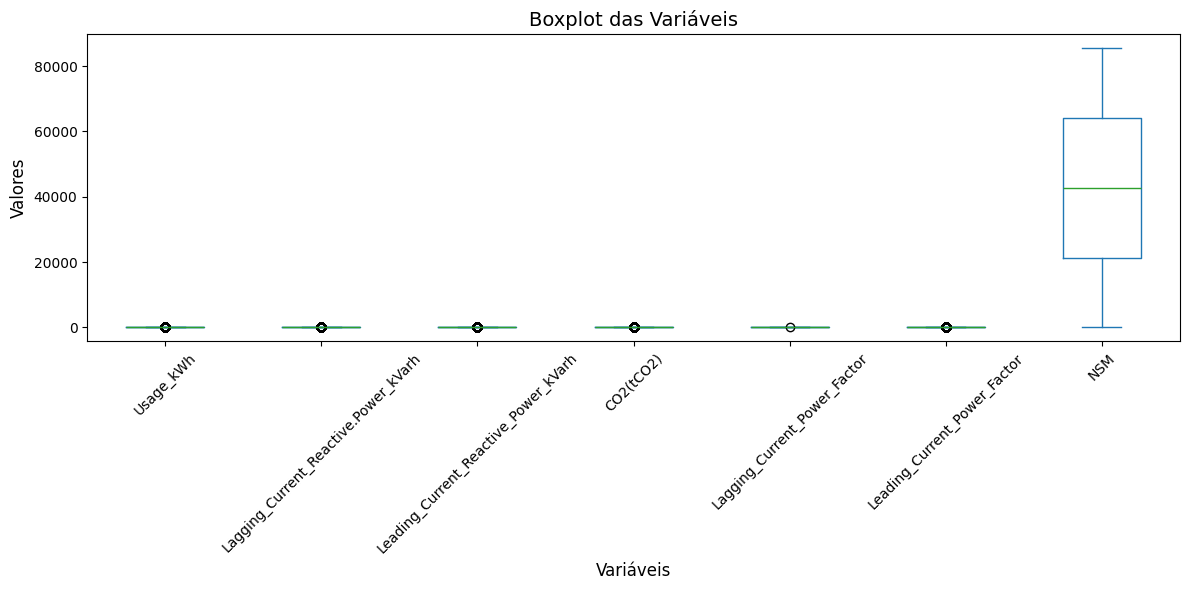

In [ ]:
plt.figure(figsize=(12, 6))
dados.plot(kind='box', figsize=(12,6))

plt.xticks(rotation=45, fontsize=10)
plt.title("Boxplot das Variáveis", fontsize=14)
plt.ylabel("Valores", fontsize=12)
plt.xlabel("Variáveis", fontsize=12)

plt.tight_layout()
plt.show()

Sem o NSM

<Figure size 1200x600 with 0 Axes>

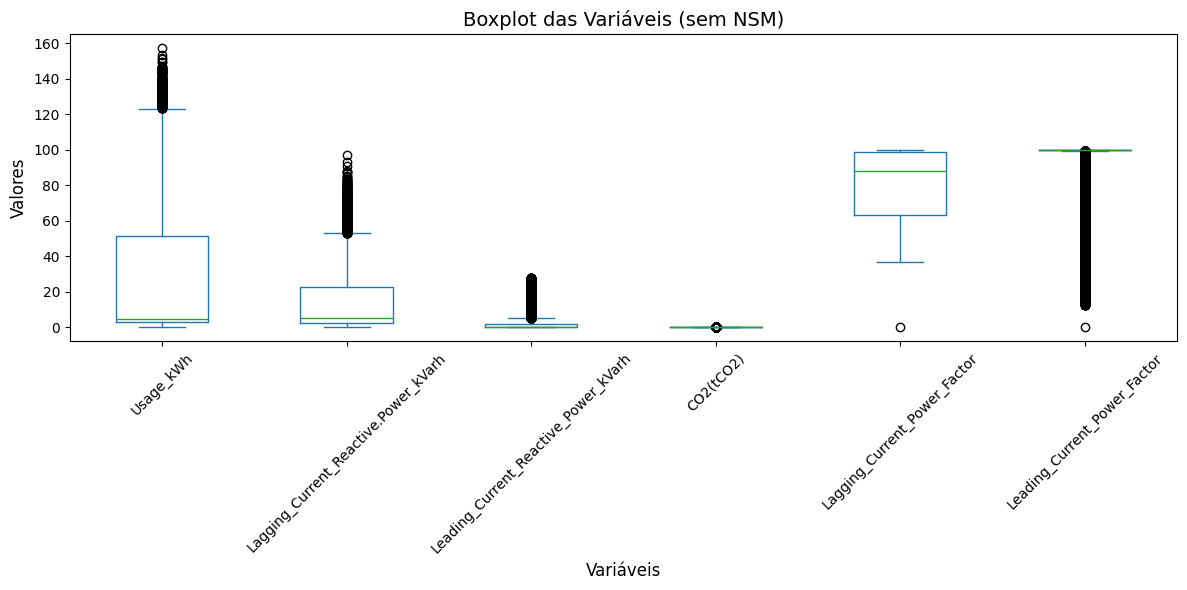

In [ ]:
import matplotlib.pyplot as plt

# Remove a coluna NSM
dados_sem_nsm = dados.drop(columns=["NSM"])

plt.figure(figsize=(12, 6))
dados_sem_nsm.plot(kind='box', figsize=(12,6))

plt.xticks(rotation=45, fontsize=10)
plt.title("Boxplot das Variáveis (sem NSM)", fontsize=14)
plt.ylabel("Valores", fontsize=12)
plt.xlabel("Variáveis", fontsize=12)

plt.tight_layout()
plt.show()

Calculando a media para todos os atributos

In [ ]:
dados.mean(numeric_only=True)

,0
Usage_kWh,27.386892
Lagging_Current_Reactive.Power_kVarh,13.035384
Leading_Current_Reactive_Power_kVarh,3.870949
CO2(tCO2),0.011524
Lagging_Current_Power_Factor,80.578056
Leading_Current_Power_Factor,84.367870
NSM,42750.000000


Calculando o desvio-padrão para todos os atributos

In [ ]:
dados.std(numeric_only=True)

,0
Usage_kWh,33.444380
Lagging_Current_Reactive.Power_kVarh,16.306000
Leading_Current_Reactive_Power_kVarh,7.424463
CO2(tCO2),0.016151
Lagging_Current_Power_Factor,18.921322
Leading_Current_Power_Factor,30.456535
NSM,24940.534317


Calculando a variância para todos os atributos

In [ ]:
dados.var(numeric_only=True)

,0
Usage_kWh,1.118527e+03
Lagging_Current_Reactive.Power_kVarh,2.658856e+02
Leading_Current_Reactive_Power_kVarh,5.512265e+01
CO2(tCO2),2.608490e-04
Lagging_Current_Power_Factor,3.580164e+02
Leading_Current_Power_Factor,9.276005e+02
NSM,6.220303e+08


Calculando a correlação

In [ ]:
dados.corr(numeric_only=True)

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
Usage_kWh,1.000000,0.896150,-0.324922,0.988180,0.385960,0.353566,0.234610
Lagging_Current_Reactive.Power_kVarh,0.896150,1.000000,-0.405142,0.886948,0.144534,0.407716,0.082662
Leading_Current_Reactive_Power_kVarh,-0.324922,-0.405142,1.000000,-0.332777,0.526770,-0.944039,0.371605
CO2(tCO2),0.988180,0.886948,-0.332777,1.000000,0.379605,0.360019,0.231726
Lagging_Current_Power_Factor,0.385960,0.144534,0.526770,0.379605,1.000000,-0.519967,0.565270
Leading_Current_Power_Factor,0.353566,0.407716,-0.944039,0.360019,-0.519967,1.000000,-0.360563
NSM,0.234610,0.082662,0.371605,0.231726,0.565270,-0.360563,1.000000


Calculando o minimo para todos os atributos


In [ ]:
dados.min(numeric_only=True)

,0
Usage_kWh,0.0
Lagging_Current_Reactive.Power_kVarh,0.0
Leading_Current_Reactive_Power_kVarh,0.0
CO2(tCO2),0.0
Lagging_Current_Power_Factor,0.0
Leading_Current_Power_Factor,0.0
NSM,0.0


Calculando o máximo para todos os atributos


In [ ]:
dados.max(numeric_only=True)

,0
Usage_kWh,157.18
Lagging_Current_Reactive.Power_kVarh,96.91
Leading_Current_Reactive_Power_kVarh,27.76
CO2(tCO2),0.07
Lagging_Current_Power_Factor,100.00
Leading_Current_Power_Factor,100.00
NSM,85500.00
